Author: [Emmanuel Rachelson](https://personnel.isae-supaero.fr/emmanuel-rachelson?lang=en).<br>
License: CC-BY-SA-NC.<br>
The latest version of this tutorial is available at [https://github.com/erachelson/RLtuto](https://github.com/erachelson/RLtuto).

**A few words about the author:**<br>
I am a Reinforcement Learning researcher with a few other scientific interests (Operations Research, Planning, Machine Learning). I defended my PhD in 2008 and my habilitation in 2020, and have occupied both academic and industry positions in research, before joining ISAE-SUPAERO in 2011 as an Associate Professor, then a Full Professor. I created the [Data and Decision Sciences](https://supaerodatascience.github.io) Master-level curriculum, which is now running with the help of an incredible team of speakers and professors, for even more incredible students. I kickstarted the Artificial Intelligence and Business Transformation master program. I also founded [SuReLI](https://sureli.github.io), ISAE-SUPAERO's Reinforcement Learning research Initiative.

**Abstract**<br>
This tutorial aims at introducing the key concepts in (Deep) Reinforcement Learning in a practical, intuitive way, for people who don't know Reinforcement Learning. It keeps the jargon, technicalities and theory as limited as possible in order to leave room for algorithms and individual practice.<br>
It supposes the reader has a minimum knowledge of Python and a few basic math (probability and optimization) notions.

**References:**<br>
Readers interested in the field are encouraged to discover more by consulting the following references.
<table>
<tr>
<td><img src="img/book_szepesvari.jpg" style="width: 100px;"></td>
<td>
    
**Algorithms for Reinforcement Learning**<br>Csaba Szepesvari<br>2010.<br>The essentials in 104 pages. A bit mathematical.<br>PDF available <a href="https://sites.ualberta.ca/~szepesva/RLBook.html">here</a> (last update in 2017).</td>
</tr>
<tr>
<td><img src="img/book_sutton.jpg" style="width: 100px;"></td>
<td>
    
**Reinforcement Learning: an introduction**<br>Richard Sutton and Andrew Barto<br>2018 (second edition).<br>The Reinforcement Learning bible. Both complete and didactical.<br><a href="http://incompleteideas.net/book/the-book.html">Online versions</a> of the <a href="http://incompleteideas.net/book/the-book-1st.html">1st</a> and <a href="http://incompleteideas.net/book/the-book-2nd.html">2nd</a> editions.</td>
</tr>
<tr>
<td><img src="img/web_silver.png" style="width: 100px;"></td>
<td>
    
**David Silver's UCL course on RL**<br>10 video lectures + presentation PDFs.<br>2015.<br><a href="http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html">Available here</a>.</td>
</tr>
<tr>
<td><img src="img/web_rlvs.png" style="width: 100px;"></td>
<td>
    
**The Reinforcement Learning Virtual School**<br>20+ online classes, from RL basics to state-of-the-art topics.<br>2021.<br><a href="https://rl-vs.github.io/rlvs2021">Available here</a>.</td>
</tr>
</table>

**Installation**  
`pip install torch gym gym[atari,accept-rom-licence] pyglet opencv-python`

**Table of contents**
1. [What is Reinforcement Learning ?](#sec1)
2. [Let's have fun, let's learn to play Breakout](#sec2)
3. [Moving towards real-life problems](#sec3)
4. [A bit of theory](#sec4)
5. [Your turn to play](#sec5)
6. [Wrapping up and going further](#sec6)

# <a id="sec1"></a> 1. What is Reinforcement Learning?

Reinforcement Learning is the discipline that studies how one can learn to control a system through interaction.

<img src="img/juggle.jpg" width="400px">

- No model
- The *learning* version of Stochastic Optimal Control.
- Applies to industrial scheduling, robotics control, Go playing...

<div class="alert alert-success"> 
    
**The goal in RL**<br>
Construct a close-loop control policy that maximizes a certain criterion, based on interaction data.
</div>

# <a id="sec2"></a> 2. Let's have fun, let's learn to play Breakout

## Breakout

Breakout is an old Atari 2600 game. Let's play a little with the OpenAI Gym environment.

OpenAI Gym is a collection of sequential decision making environments. It is designed to develop and compare RL algorithms and provides a standard API across environments.
- https://gym.openai.com/
- https://github.com/openai/gym
- https://www.gymlibrary.ml/

In [ ]:
import gym
import gym.envs.atari as atari
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [ ]:
all_envs = gym.envs.registry.all()
env_ids = [env_spec.id for env_spec in all_envs]
print(sorted(env_ids))

In [ ]:
breakout = gym.make('Breakout-v4')

In [ ]:
print(breakout.observation_space)
print(breakout.observation_space.shape)
print(np.min(breakout.observation_space.low))
print(np.max(breakout.observation_space.high))
print(breakout.action_space)

In [ ]:
x = breakout.reset()
plt.imshow(x)
plt.show()

In [ ]:
import time

for _ in range(3):
    breakout.reset()
    breakout.step(1)
    breakout.render()
    for i in range(100):
        a = 2+np.random.randint(2)
        observation, reward, done, info = breakout.step(a)
        breakout.render()
        time.sleep(1./60.)
        if done:
            print("game over") # when will this game stop?

In [ ]:
breakout.close()

The 4 available actions in Breakout are as follows:
- 0 NOOP (no operation)
- 1 FIRE (press fire button)
- 2 RIGHT (move paddle right)
- 3 LEFT (move paddle left)

Let's observe the output of an `env.step(a)` command.

In [ ]:
breakout.reset()
s, r, d, info = breakout.step(1)
print(s.shape)
print(r)
print(d)
print(info)

Whenever we press a button, the `step` function returns:
- the next screen, 
- a "reward" signal indicating how much we've won during this time step,
- a boolean indicating if we've lost,
- some extra information.

So that's pretty close to the information a human player would have, time step after time step (no ball coordinates, no velocities, etc. just the raw RGB image).

<div class="alert alert-warning">
Let's discuss for a minute how you believe a human player learns to play Breakout.
</div>

## A few other environments

FrozenLake is a small, text-rendering-based, toy environment, where you want to navigate across a slippery map (try `help(fl.FrozenLakeEnv)` below for details).

In [ ]:
import gym
import gym.envs.toy_text.frozen_lake as fl

lake = gym.make('FrozenLake-v1')
_=lake.render()

CartPole is a classic non-linear control problem, where you want to keep a pole upright and prevent it from falling down (quite similarly to a famous two-wheeled, self-balancing personal transporter).

In [ ]:
import gym
cartpole = gym.make('CartPole-v1')

print(cartpole.action_space)
print(cartpole.observation_space)
print(cartpole.env.metadata)

import time

x = cartpole.reset()
cartpole.render()
for i in range(200):
    _, _, d, _ = cartpole.step(np.random.randint(2))
    cartpole.render()
    if d:
        print("Episode ended at time step", i)
        #break
        cartpole.reset()
    time.sleep(cartpole.tau) # not actually real-time, just for readability

In [ ]:
cartpole.close()

SwingUp is a home-made, (much) more difficult version of CartPole where the pole starts in the stable equilibrium point. Instead of learning how to stabilize it around the unstable equilibrium point, we'd like to learn to swing it up before balancing it around the upright position.

In [ ]:
from environments.swingup import CartPoleSwingUp
swingup = CartPoleSwingUp()

import numpy as np

x = swingup.reset()
swingup.render()

for i in range(500):
    _, _, d, _ = swingup.step(np.random.randint(2))
    swingup.render()
    if d:
        print("Episode ended at time step", i)
        #break
        swingup.reset()
        swingup.render()

In [ ]:
swingup.close()

These three environments are examples which we will reuse later on in the class. For now, let's get back to playing Breakout.

## Deep Q-learning

We are going to replicate the results that were introduced in the crucial paper **[Playing Atari with Deep Reinforcement Learning](https://arxiv.org/abs/1312.5602)** by Mnih et al. (2013) and were later improved by DeepMind's paper in Nature **[Human-level control through deep reinforcement learning](https://deepmind.com/research/publications/human-level-control-through-deep-reinforcement-learning)** by Mnih et al. (2015).

We are going to need a few pre-requisites that we will introduce with as little theory as possible.

We are going to implement Q-learning, the most classic RL algorithm. To do so, we need to introduce the notion of Q-values (we will call it Q-value of Q-function indistinctively).

<div class="alert alert-success">
    
**Q-values**<br>
The Q-value of an "image, action" pair indicates how much we can expect to score if we start by performing this action, from the current image. So $Q(image,action)$ ranks actions in a given state of the game. For simplicity, we will write it $Q(s,a)$.
</div>

So if we know the best possible $Q$-function, we have actually solved our problem since we only need to act greedily with respect to this function. The goal of Q-learning is precisely to learn this optimal Q-function that we will write $Q^*$ (more details on this in the theory part).

Suppose we have a current estimate $Q$ for the optimal Q-function and we have just played $a$ in state $s$. That is, we have observed the $(s,a,r,s')$ transition, where:
- $s$ is the starting state (image)
- $a$ is the action performed
- $r$ is the transition's observed reward
- $s'$ is the reached state (image)

Then one can remark that the sum $r + \max_{a'} Q(s',a')$ gives an estimate of how much we can get in the long run. Of course, if $Q$ is close to $Q^*$, then this estimate is good. Otherwise, this estimate is poor.

To discriminate between a reward obtained now and another obtained in one time step, we introduce a *discount* factor $\gamma$ on future rewards. So the overall score estimate is $r + \gamma \max_{a'} Q(s',a')$

We can compare this estimate $r + \gamma \max_{a'} Q(s',a')$ to what we actually believed was the value of the $(s,a)$ pair *before* we tried action $a$ and compute a correction term that we will call a temporal difference:

$$\delta=r+\gamma \max_{a'} Q(s',a') - Q(s,a)$$

The temporal difference (TD in short) measures the difference in the estimate of $Q^*$ before and after obtaining the sample $(s,a,r,s')$. Ideally, we want to "pull" the estimate of $Q^*(s,a)$ towards $r+\gamma \max_{a'} Q(s',a')$. So that means pulling it in the direction of the temporal difference.

So this gives a straightforward algorithm:

<div class="alert alert-success">
    
**Q-learning**<br>
Repeat:
<ol>
<li> In $s$, choose $a$
<li> Observe $r$, $s'$
<li> Temporal difference: $\delta=r+\gamma \max_{a'} Q(s',a') - Q(s,a)$
<li> Update $Q$: $Q(s,a) \leftarrow Q(s,a) + \alpha \delta$
<li> $s\leftarrow s'$
</ol>
</div>

<div class="alert alert-warning">
    
**Brainstorming**<br>
What conditions do you think we should impose for this procedure to work?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>
<ul>
<li> 
    
We need to obtain samples for every $(s,a)$ pair so the action selection procedure should **explore**. That means every $(s,a)$ pair should be visited often enough to let $Q(s,a)$ converge. But we're more interested in fast convergence in state-action pairs that yield high scores, so we would also like to focus on them and thus **exploit** already acquired knowledge. This is called the **exploration versus exploitation tradeoff**.
<li> 
    
Writing $Q(s,a) \leftarrow Q(s,a) + \alpha \delta$  means that for every experience sample $(s,a,r,s')$ we take a small step towards a (hopefully) better estimate of $Q^*$. This is a well-known problem in optimization called *stochastic approximation* and popularized in recent years under the name of *Stochastic Gradient Descent* (SGD). SGD is guaranteed to converge under certain conditions on the step size $\alpha$, which we will study in the theoretical part.
</details>

## Deep neural networks and Q-learning

An issue with the writing above is that, to obtain the true optimal Q-function, we need to collect enough representative samples in all states $s$ and all actions $a$. Let's make a quick calculation, there are:
- $256^{210 \times 160 \times 3} \sim 10^{242579}$ possible images
- 4 actions

So that's really a lot of values.

But one can remark two things:
- the images that will actually be seen in practice are way less numerous
- two "close" images are likely to have "close" optimal Q-values

So we would like to learn an approximation function that maps state-action pairs to a scalar value, that we can train incrementally. Neural networks are just perfect for that task and deep neural networks have been the key to impressive results in the last decade. Additionnaly, our state is an image so that's even better: we can use convolutional neural networks (CNN) that learn functions over images and are at the core of the Deep Learning revolution.

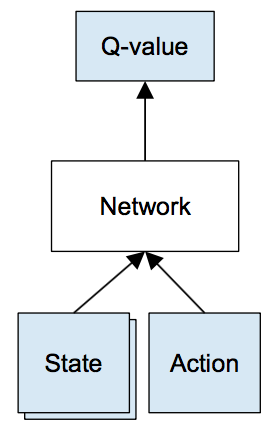</img>

Let's modify slightly the previous algorithm to include a neural network $f$ as a Q-function approximator.

<blockquote>
Repeat:
<ol>
<li> 
    
In $s$, choose $a$
<li> Observe $r$, $s'$
<li> Define $x=(s,a)$ and $y=r+\gamma \max_{a'} f(s',a')$
<li> $f$.train(x,y)
<li> $s\leftarrow s'$
</ol>
</blockquote>


## State definition

If we define the game's state to hold only the last frame, it might not be enough to define an informative enough state. For instance, having just a snapshot image only gives us the position of the ball but not its velocity. So we will expand the state so that it contains the 4 last frames from the game.

One frame is a $210\times 160$ RGB image with a 256 color palette, so the set of all possible frames has size $256^{210 \times 160 \times 3} \sim 10^{242579}$. That's a little too many for an efficient enumeration. Even by converting the image to greyscale, downsampling to a $110\times 84$ and then cropping to an $84\times 84$ image to keep only the playing area (as we shall do a little later to slightly simplify the problem), that's still around $10^{16980}$ possible states. So, definitely, this discrete problem is not suitable for complete enumeration.

Of course, most of the possible images will never occur in a Breakout game and the true state space is actually a much smaller subset of the full set of possible images. Nevertheless, unless we provide a large engineering effort in describing the state space with few variables (which would be contradictory of our goal of a "human-level" AI) we will need to automatically discover some structure in the state sampled data, hence justifying our usage of deep neural networks.

In [ ]:
from skimage.color import rgb2gray
from skimage.transform import resize

def process_screen(x):
    return 256*resize(rgb2gray(x), (110,84))[17:101,:]

x = breakout.reset()
y = process_screen(x)
plt.imshow(y, cmap="gray")
plt.show()
print(y.shape)

In [ ]:
# stack the 4 last frames
z = np.stack([y,y,y,y],axis=0)
print(z.shape)

One nice thing about OpenAI Gym is that it provides lots of wrappers around the base environments. For example, the following wrapper does almost all the previous operations (greyscale, subsampling, cropping, frame stacking). This wrapper actually only stores each frame once which optimizes memory efficiency.

In [ ]:
from gym.wrappers import AtariPreprocessing, FrameStack

breakout = gym.make('BreakoutNoFrameskip-v4')
breakout = AtariPreprocessing(breakout,
                                frame_skip=4,
                               grayscale_obs=True,
                               scale_obs=True)
breakout = FrameStack(breakout, 4)

x = breakout.reset()
print(x.shape)
print(x[0].shape)
plt.imshow(x[0], cmap="gray")
plt.show()

## A specific neural network structure

Let's define a Convolutional Neural Network (CNN) that will predict our Q-values. When we choose a greedy action, we need to evaluate $Q(s,a)$ for all possible $a$. So in our case, that means propagating $(s,a)$ values 4 times through our network. It would be more efficient to build a network that predicts the values of the 4 actions in a single pass for a given state $s$. So we define the input of our Q-network as the state only, and the output as the 4-dimensional vector evaluating each action.

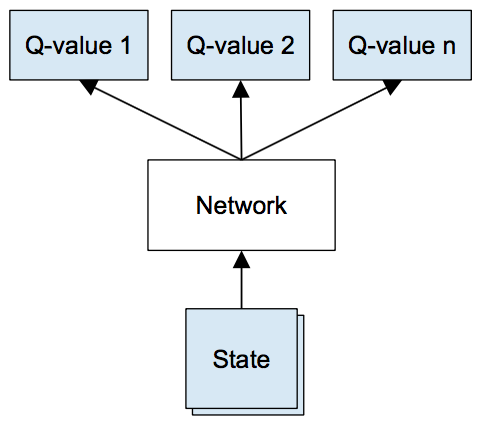</img>

Then, our network has the following structure:
- input: $84\times 84\times 4$ image (the last 4 frames)
- layer 1: Convolutions with 16 filters of size $8\times 8$ and stride 4. The activation is a ReLU function.
- layer 2: Convolutions with 32 filters of size $4\times 4$ and stride 2. The activation is a ReLU function.
- layer 3: Fully connected with 256 ReLU units
- layer 4 (output): Fully connected with 4 linear units (one for each action's value)

Graphically, this yields the following network structure.
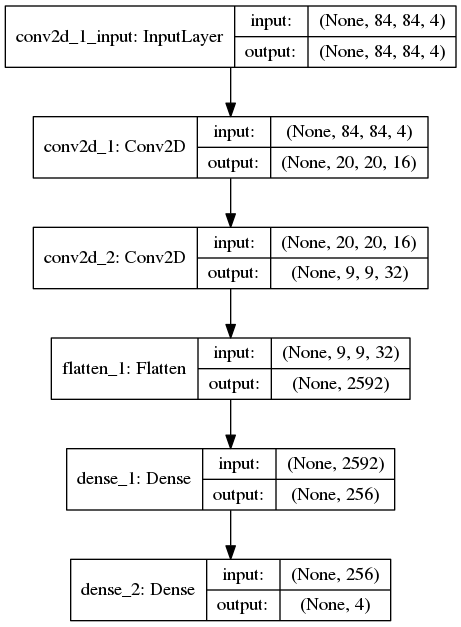</img>

We refer to this type of CNN as *Deep Q-Networks* (DQN).

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class BreakoutCNN(nn.Module):
    def __init__(self, in_channels=4, n_actions=4):
        super(BreakoutCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=8, stride=4)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=4, stride=2)
        self.fc = nn.Linear(9 * 9 * 32, 256)
        self.head = nn.Linear(256, n_actions)
      
    def forward(self, x):
        x = x.to(device)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.fc(x.view(x.size(0), -1)))
        return self.head(x)

The DQN above is generally sufficient to start learning good strategies for Atari games. It was introduced in the 2013 classical **[Playing Atari with Deep Reinforcement Learning](https://arxiv.org/abs/1312.5602)** paper. However, the "canonical" architecture for playing Atari is rather the one proposed in the **[Human-level control through deep reinforcement learning](https://deepmind.com/research/publications/human-level-control-through-deep-reinforcement-learning)** paper in 2015. The latter uses this architecture:
- input: $84\times 84\times 4$ image (the last 4 frames)
- layer 1: Convolutions with 32 filters of size $8\times 8$ and stride 4. The activation is a ReLU function.
- layer 2: Convolutions with 64 filters of size $4\times 4$ and stride 2. The activation is a ReLU function.
- layer 3: Convolutions with 64 filters of size $3\times 3$ and stride 1. The activation is a ReLU function.
- layer 4: Fully connected with 512 ReLU units
- layer 5 (output): Fully connected with 4 linear units (one for each action's value)

It's been a while since you have done something yourself in this class. Let's be a bit active and warm-up.

<div class="alert alert-warning">
    
**Exercise:** Change the code above to create this DQN.
</div>


In [ ]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the next cell to load a solution.

In [ ]:
# %load solutions/ex1.py

## Experience Replay

Neural networks learn better when the samples are fed to them in *mini-batches* rather than one by one. To implement this, our algorithm must remember the mapping $s,a\mapsto r+\gamma\max_{a'}Q(s',a')$ for all the $(s,a)$ in a given mini-batch. So that means keeping a memory of the $(s,a,r,s')$ samples.

But if we're going to store the $(s,a,r,s')$ samples, we might as well use each of them several times, to build increasingly better values for $r+\gamma\max_{a'}Q(s',a')$, as $Q$ gets more accurate (close to $Q^*$). This leads to the idea of *Experience Replay*: we store a *replay memory* of experience samples, among which we randomly draw elements that will constitute our mini-batch.

Given this last idea, lets implement an Experience Replay Q-learning using our DQN. The algorithm's pseudo-code is:

         state = init()
         loop:
            action = greedy_action(network) or random_action()
            new_state, reward = step(state, action)
            replay_memory.add(state, action, reward, new_state)
            minibatch = replay_memory.sample(minibatch_size)
            X_train = Y_train = []
            for (s,a,r,s') in minibatch:
                Q  = network.predict(s)
                Q' = network.predict(s')
                if non-terminal(s'): 
                    update = r + gamma * max(Q')    
                else:  
                    update = r
                Q[a] = update
                X_train.add(s)
                Y_train.add(Q)
            network.train_one_step(X_train,Y_train)
            state = new_state

Let's start by creating a class for our replay memory.


<div class="alert alert-warning">
    
**Exercise:** Fill the missing code lines below.
</div>

In [ ]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the next cell to load a solution.

import random
import torch

class ReplayBuffer:
    '''
    A replay memory. Implements a fixed size circular (FIFO) buffer, with constant time insertion and sampling.
    '''
    def __init__(self, capacity):
        self.capacity = capacity # capacity of the buffer
        self.data = []
        self.index = 0 # index of the next cell to be filled

    def append(self, s, a, r, s_, d):
        # TODO
        # Don't forget: once the buffer is full, old elements are the first to be popped out.

    def sample(self, batch_size):
        # It will be useful to have separate torch.Tensor for the each element type in the sampled minibatch.  
        # That is one Tensor for a minibatch of states, another for actions, etc.
        batch = random.sample(self.data, batch_size)
        return list(map(lambda x:torch.Tensor(x).to(device), list(zip(*batch))))

    def __len__(self):
        return len(self.data)

In [ ]:
# %load solutions/ex2.py

In each state, we will need to find the best estimated action, that is $\arg\max_a Q(s,a)$.

<div class="alert alert-warning">
    
**Exercise:**  
Define a utility function that computes the greedy action from a DQN and a batch of states.
</div>

In [ ]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the next cell to load a solution.

import torch

def greedy_action(network, state):
    # TODO

In [ ]:
# %load solutions/ex3.py

<div class="alert alert-warning">
    
**Exercise:**  
Fill the blanks in the code below to write a class that keeps a replay buffer as internal attribute and implements the pseudo-code we wrote earlier.  
Here are a few tips:
- To pick an action at each step and to balance exploration versus exploitation, draw a random value between 0 and 1. If it is below $\epsilon = 0.2$, pick a random action, otherwise, pick the greedy action in the current state.
- A common optimizer (instead of plain SGD) is RMSprop.
- Assume the interaction with the environment will be episodic and run the training for a certain number of episodes.

Write your class but don't run this code just yet!
</div>

In [ ]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the next cell to load a solution.

import numpy as np
import torch
import torch.nn as nn

class DQN_agent:
    def __init__(self, config, model):
        self.gamma = config['gamma']
        self.batch_size = config['batch_size']
        self.nb_actions = config['nb_actions']
        self.memory = ReplayBuffer(config['buffer_size'])
        self.epsilon = config['epsilon']
        self.model = model.to(device) 
        self.criterion = # TODO: what is the loss used to train the DQN?
        self.optimizer = torch.optim.RMSprop(self.model.parameters(), lr=config['learning_rate'])
    
    def gradient_step(self):
        # TODO
        # Implement drawing a minibatch and performing one gradient step on the DQN
    
    def train(self, env, max_episode):
        # TODO
        # Implement the algorithm that 
        #    picks an epsilon-greedy action
        #    plays this action
        #    adds the sampled transition to the replay buffer
        #    takes a gradient step
        #    moves on to the next time step
        # until max_episodes have been performed.

In [ ]:
# %load solutions/ex4.py

Here is an example of usage of such a code. It is placed on purpose in a text cell so that you don't run it by mistake.

```python
breakout = gym.make('BreakoutDeterministic-v4')
config = {'gamma': 0.95,
          'batch_size': 64,
          'nb_actions': cartpole.action_space.n,
          'buffer_size': 10000000,
          'epsilon': 0.2,
          'learning_rate': 0.001}
BreakoutDQN = BreakoutCNN().to(device)
BreakoutLearner = DQN_agent(config, BreakoutDQN)
BreakoutLearner.train(breakout, 200)
```

There are three main reasons for not running this code yet.
1. Training a CNN might take a long time. Unless you have a good GPU and a fair amount of time ahead of you (several hours or more), it is recommended to run this computation for a limited number of episodes, on a cloud computing service (or on a dediated machine).
2. We have not implemented any monitoring of the training, so if anything fails, we will just have lost time.
3. There are many (many!) ways to make this algorithm more efficient.

If you really want to try, I recommend training for a single episode.

If you actually run the code above, it is likely that the neural network will not converge to a good estimate of $Q^*$ and might even diverge. There are a couple of extra tricks that improve the previous algorithms, in particular the introduction of *target networks* but we avoid them for the sake of simplicity.

Additionally, there are many (really many) ways to make the learning drastically more efficient. The field has been blooming for the last years. Parallelization, sample efficiency, distribution estimation, network stabilization... many hot topics are still open research areas and the progress has been incredibly fast.

Below is a video of what you should get (along and) after training:

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("TmPfTpjtdgg")

# <a id="sec3"></a> 3. Moving towards real-life problems

Ok, that was fun. We now have an intuitive understanding of a learning procedure that moves towards an optimal strategy. Let's take a step back and consider how this can help us for more "serious", real-life problems.

Consider the following problems:

- stabilizing a double inverted pendulum

<img src="img/double_pendulum.gif" width="200px">

- Scheduling elevator movements

<img src="img/elevators.jpg" width="200px">

- Fluid flow control

<img src="img/flow.png" width="200px">

- Game playing

<img src="img/breakout.jpg" width="200px">

- Traffic jam navigation

<img src="img/gps.png" width="200px">

But also:
- robot motor skill aquisition
- agro-ecosystems policy design
- supply-chain management and vehicle routing
- frequency allocation in LEO telecom satelites
- chatbot dialog management
- personalized therapeutic strategies
- etc.

<div class="alert alert-warning"> 
    
**Brainstorming**<br>
Can you see why all these problems fall into a common category? Can you describe this category of problems?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>
<ul>
    <li> Sequences of decisions (actions), </li>
    <li> Stochastic, complex, non-linear dynamics (possibly), </li>
    <li> No available formal model, </li>
    <li> Goal: closed-loop control policies (strategies, control laws, behaviours), </li>
    <li> Goal: find an optimal behaviour. </li>
</ul>

In technical terms, this is the framework of **Discrete-time Stochastic Optimal Control**. Reinforcement Learning is the set of procedures that try to solve this family of problems **without** the elaboration of a model, using **interaction data** directly.

Let us rephrase the above statements with a drawing and a more AI-ish vocabulary.

<img src="attachment:rl.png" width="500px">

We consider an agent that needs to take a sequence of decisions (*discrete-time*), so that its overall behaviour (*control*) is a good as possible (*optimal*) in an environment whose dynamics are possibly *stochastic*. At each time step, the RL agent observes a *reward signal* indicating how much it gained from the last transition between states. The RL agent tries to find the optimal behaviour without a model of the environment and through interaction data.
</details>

So the key idea of RL is that powerful enough learning procedures can help tackle these difficult problems.

<div class="alert alert-success">
    
**Caveat**<br>
RL is **not** the solution to all your control problems.
<ul>
    <li> If you have a reliable model and good analysis tools (Dynamic Programming, Linear Control Theory, Operations Research models...), use them!
    <li> Many RL methods are slow, sample-inefficient, unstable, etc. Even if great successes are being obtained, don't be fooled, there is still lots of research to be done before the field reaches a full maturity.
    <li> There are probably many other reasons.
</ul>
I'm a researcher in RL. I hope to convince you that RL is a great investigation topic with an awesome potential. But I also want you to keep a critic eye on the field.
</div>

<div class="alert alert-success">
    
**A few key fundamental issues in RL:**<br>
<ul>
    <li> The exploration/exploitation trade-off, deceptive rewards,
    <li> Value function approximation quality,
    <li> Convergence guarantees and speed (sample complexity),
    <li> Parametrized policies and value functions, Actor-Critic architectures, etc.
</ul>
</div>

<div class="alert alert-success">
    
**A few key practical issues in RL:**<br>
<ul>
    <li> Reproducibility and statistical representativity,
    <li> Robustness and transferability,
    <li> Safety,
    <li> Computationnal burden, scaling up.
</ul>
</div>

# <a id="sec4"></a> 4. A bit of theory

Let's formalize this a little on the white board. Here are the topics we should cover to provide a sound foundation to the experiment above:
- Markov Decision Processes,
- Policies, optimality criteria and Value functions,
- Bellman's optimality principle (and the corresponding equations),
- Q-learning is a stochastic optimization procedure.

All these topics are covered in (for instance) the "[RL fundamentals](https://rl-vs.github.io/rlvs2021/rl-fundamentals.html)" class of the 2021 Reinforcement Learning Virtual School, which you can freely access.

We can also decide to skip this part if you want to play a little.

# <a id="sec5"></a> 5. Your turn to play

There are endless practice opportunities. I suggest the following exercises. They are meant to help you practice, but also to trigger questions and discussions in class.

<div class="alert alert-warning">
    
**Exercise:**  
Adapt the previous code to train a good control policy on CartPole.
- Use a simple network with 2 hidden layers and 24 ReLU neurons on each layer.
- To encourage early exploration and let the agent exploit at later stages, take a constant $\epsilon_{max}$ value during $\tau_{delay}$ time steps, then substract $\epsilon_{step}$ from $\epsilon$ at every time step until you reach time $\tau_{period}$. Take $\epsilon_{max}=1$, $\epsilon_{min=0.01}$, $\tau_{delay}=20$ and $\tau_{period}=1000$.  
- After each training episode store the episode's cumulated return for monitoring.
- Train for 200 episodes, with a learning rate of $0.001$, a batch size of $20$, $\gamma=0.95$ and a replay buffer of maximum $1000000$ samples.  
</div>

In [ ]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the next cell to load a solution.

In [ ]:
# %load solutions/ex5.py

It seems to work reasonably well, although not perfectly. Let's take a step back and answer a few (open) questions.

<div class="alert alert-warning">
    
**Exercise:**  
- Is the episodic return plot (above) actually a good indicator of the greedy policy's efficiency ? Why or why not?
- Is the linear decrease of $\epsilon$ a good schedule?
- Should we change the optimizer?
- Is it a good (or a bad) idea to take a gradient step for each acquired sample?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

- The episodic return indicates how the $\epsilon$-greedy policy performs. So it includes the influence of the random exploration. Even though $\epsilon$ becomes small at the end of the learning, in some more difficult environments, the actual value of the greedy policy might be different from that of the $\epsilon$-greedy one.
- The linear decrease of $\epsilon$ defines a rather inefficient exploration scheme. Some state-action pairs that are close to the starting state are tried very often, are over-represented in the replay buffer, and could probably avoid exploration altogether. Conversely, some rarely visited states might lack samples. So one could wish for a more *contextual* notion of exploration; one that would depend on the current state for instance, or one that would actually *plan* the exploration for better *sample efficiency*.
- It is interesting and easy to change the optimizer. For CartPole, it seems that ADAM is a better choice than RMSprop but this is not a general rule.
- Why take a single gradient step on the network's loss when a new sample is collected? Taking several gradient steps can greatly accelerate the convergence in terms of number of collected samples. There is a limitation to this idea though: if the policy changes too fast, then the samples present in the replay buffer might now remain representative of the states and actions this policy will visit, and this can slow down (in the best case) convergence. So more gradient steps at every sample seem like a good idea but it is actually quite a dangerous practice that requires caution.
</details>

<div class="alert alert-warning">
    
**Exercise:**  
In the theory part of the class, we have introduced Approximate Value Iteration. Why is DQN an approximate value iteration algorithm? 
By noting that the training loss is a (reasonably good) proxy for the network's approximation error, what could we do to improve this approximation error and thus the convergence of DQN?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>
We have seen that AVI corresponds to the sequence $Q_{n+1} = \mathcal{A} T^* Q_n$, with $\mathcal{A}$ an approximation operator and $T^*$ the Bellman optimality operator.

DQN actually defines a sequence of functions where one obtains $Q_{n+1}$ by taking a single stochastic gradient step from $Q_n$. Specifically, one samples a minibatch of $x=(s,a)$, draws realizations of the corresponding $T^* Q_n (s,a)$ under the form $y=r+\gamma\max_{a'}Q_n(s',a')$, and then takes a gradient step to bring $Q_n$ closer to these realizations. This defines the approximation operator $\mathcal{A}$. 

We remark that the training loss is a proxy for the approximation error. And since the approximation error conditions the improvement in AVI, we would like to keep it small. One way to do this could be to take *several gradient steps* with respect to the same $Q_n$ before defining $Q_{n+1}$. 

In practice, this boils down to defining two separate networks: one for $Q_n$, that is kept fixed for a number $C$ of gradient steps, and one for $Q_{n+1}$ that is learned by taking these gradient steps with respect to $Q_n$. The network for $Q_n$ is called a **target network** and is an essential ingredient for efficient DQN algorithms.
</details>

Another common pratice to stabilize learning is to clip the value of the loss' gradient between $-1$ and $1$. This is not such an uncommon trick, it actually amounts to using an L2 loss for values of the loss between $-1$ and $1$ and an L1 loss outside of this domain. This is also know as the [Huber Loss](https://en.wikipedia.org/wiki/Huber_loss) or the [smooth L1 loss](https://pytorch.org/docs/stable/nn.html#smoothl1loss).

<div class="alert alert-warning">
    
**Exercise:**  
Modify your DQN agent class from the previous exercises to include a target network (with $C$ in the order of $100$), a fixed number of gradient steps per acquired sample, and the clipping of the error term. You can also use Adam for improved efficiency.
</div>

In [ ]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the next cell to load a solution.

In [ ]:
# %load solutions/ex6.py

<div class="alert alert-warning">
    
**Exercise:**  
Run your code to learn an efficient policy for CartPole. Don't forget to reset the network before you start learning.
</div>

In [ ]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the next cell to load a solution.

In [ ]:
# %load solutions/ex7.py

<div class="alert alert-warning">
    
**Exercise:**  
Train on SwingUp.
</div>

In [ ]:
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line in the next cell to load a solution.

In [ ]:
# %load solutions/ex8.py

Did your DQN learn to avoid the -10 penalty instead of swinging up? The exploration question becomes a crucial issue, doesn't it?

# <a id="sec5"></a> 6. Wrapping up and going further

We have seen that Reinforcement Learning is the set of procedures that aim at solving the family of Discrete-time Stochastic Optimal Control problems, without the elaboration of a model, using interaction data directly.

It builds upon the generic framework of Markov Decision Processes.

We have introduced (without technicalities) the key ideas that lead to the DQN family of algorithms, and then formalized it to the more general set of algorithms that derive from Approximate Dynamic Programming (which includes approximate value iteration). On the way, we showed that DQN was an specific case of an approximate value iteration algorithm.

Departing from this, we can explore further:
- how can one defined better exploration schemes?
- what happens when the action set is not discrete and becomes continuous?
- are neural networks the only possible function approximators and what makes a value function learning procedure efficient?

There are other families of Reinforcement Learning algorithms that do not belong to approximate dynamic programming family. They still aim at solving the same problem, but rely on other fundamental properties. Among these, we should at least mention:
- policy gradient methods and the rich family of actor-critic methods,
- evolutionary reinforcement learning methods.

These keywords define the global current literature on Reinforcement Learning. Many resources (like the [RLVS online classes](https://rl-vs.github.io/rlvs2021/)) tackle these questions (most of them are still active research fields).